<a href="https://colab.research.google.com/github/GutemaB2015/DDOS-Detection-and-Mitigation/blob/main/PrecisionRecall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BENIGN            3641
DDoS              3096
DDoS slowloris    1263
Name: Label, dtype: int64
Decision Tree Classiffier Accuracy: 0.99875
[[734   0   2]
 [  0 609   0]
 [  0   0 255]]


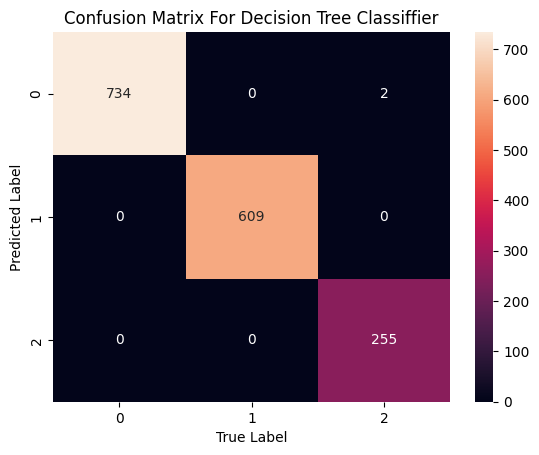

****************************************************************************************************
Decision Tree with Max Depth Accuracy: 0.99625
[[734   0   2]
 [  0 609   0]
 [  0   0 255]]


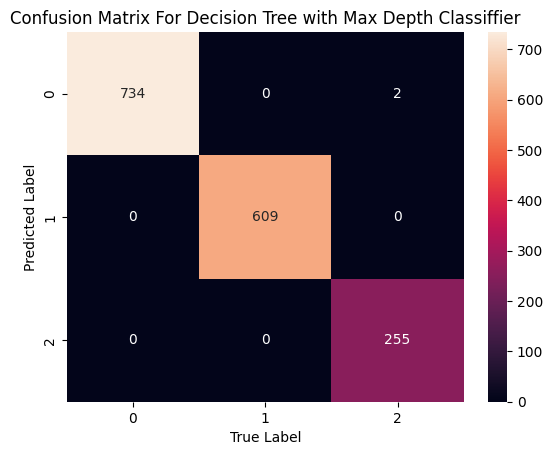

****************************************************************************************************
Random Forest Classifier Accuracy: 0.999375
[[734   0   2]
 [  0 609   0]
 [  0   0 255]]


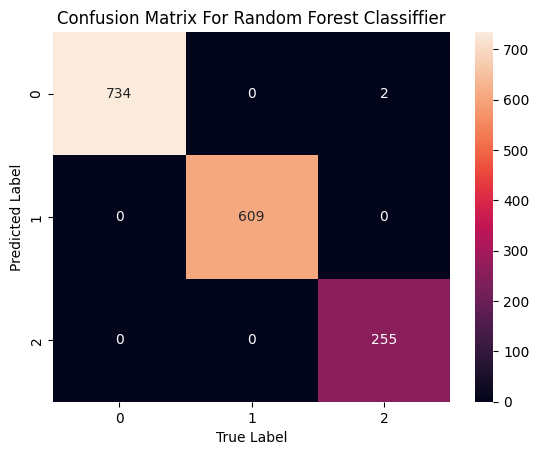

****************************************************************************************************
Naive Bayes's  Algorithm Accuracy:  0.915
[[734   0   2]
 [  0 609   0]
 [  0   0 255]]


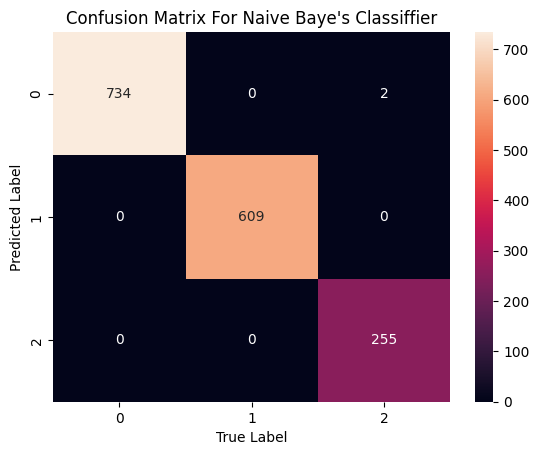

****************************************************************************************************
K-Nearest Neighbour Accuracy: 0.96125
[[734   0   2]
 [  0 609   0]
 [  0   0 255]]


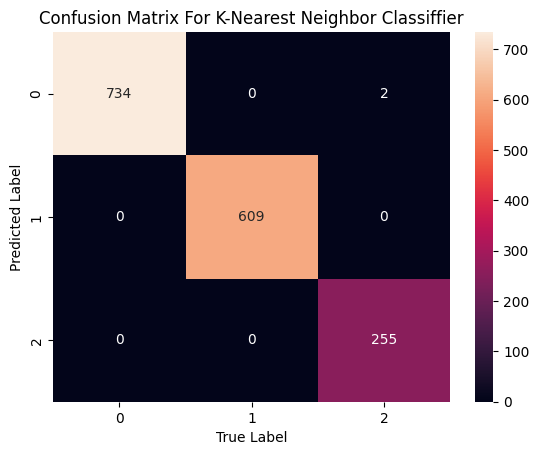

****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression algorithm Accuracy: 0.939375
[[722  12   2]
 [ 38 550  21]
 [  4  20 231]]


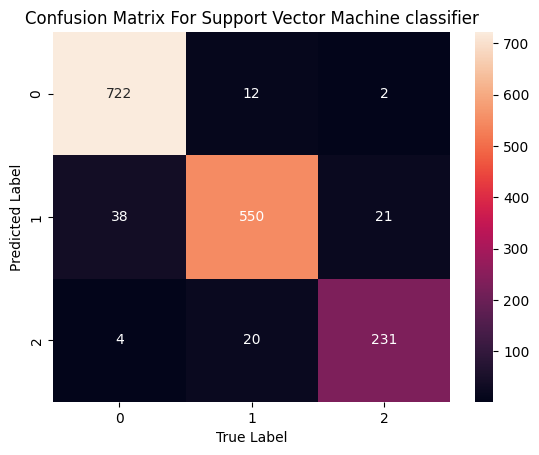

****************************************************************************************************
SVM Classifier Accuracy: 0.748125
[[708  25   3]
 [345 257   7]
 [ 12  11 232]]


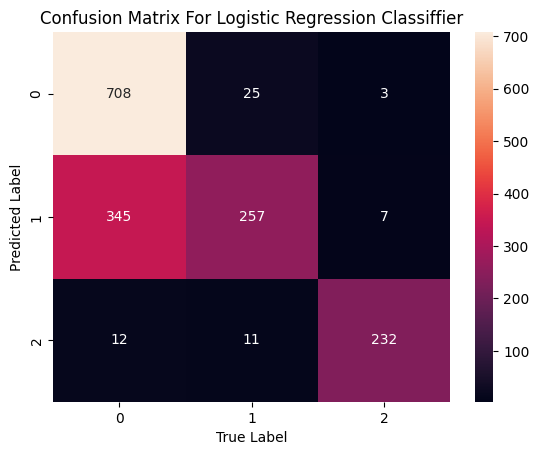

****************************************************************************************************


In [12]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns

DatasetUrl = 'https://raw.githubusercontent.com/AbdulsemedShalo/DDOS-Detection-and-Mitigation/main/FullDataset.csv'
data = pd.read_csv(DatasetUrl)

data = data.drop("Source.IP", axis=1)
data = data.drop("Destination.IP", axis=1)

# Get the number of frequencies
num_frequencies = data['Label'].value_counts()
# Print the number of frequencies
print(num_frequencies)

label_encoder = preprocessing.LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])

# Extraxt the features you want to base the foundation of our model training
features = ['Max_Packet_Length','Fwd_Packet_Length_Max','Flow_Packets_Sec','Flow_Bytes_Sec','Packet_Length_Std'
           ,'Packet_Length_Variance','Flow_IAT_Max','Fwd_IAT_Max','Subflow_Fwd_Bytes','Fwd_Packet_Length_Std'
           ,'Bwd_Packets_Sec','min_seg_size_forward','Init_Win_bytes_backward','Average_Packet_Size'
           ,'Packet_Length_Mean','Fwd_IAT_Total','Flow_IAT_Std','Fwd_IAT_Std','Avg_Fwd_Segment_Size'
           ,'Fwd_Packet_Length_Mean','Fwd_Header_Length','Fwd_IAT_Mean','Flow_IAT_Mean','Idle_Max'
           ,'Idle_Mean','Fwd_Packets_Sec']


# Replace missing values with the mean of the column
data['Fwd_Packets_Sec'].fillna(data['Fwd_Packets_Sec'].median(), inplace=True)
data['Idle_Mean'].fillna(data['Idle_Mean'].median(), inplace=True)
data['Idle_Max'].fillna(data['Idle_Max'].median(), inplace=True)
data['Flow_IAT_Mean'].fillna(data['Flow_IAT_Mean'].median(), inplace=True)

data['Fwd_IAT_Mean'].fillna(data['Fwd_IAT_Mean'].median(), inplace=True)
data['Fwd_Header_Length'].fillna(data['Fwd_Header_Length'].median(), inplace=True)
data['Fwd_Packet_Length_Mean'].fillna(data['Fwd_Packet_Length_Mean'].median(), inplace=True)
data['Avg_Fwd_Segment_Size'].fillna(data['Avg_Fwd_Segment_Size'].median(), inplace=True)

data['Fwd_IAT_Std'].fillna(data['Fwd_IAT_Std'].median(), inplace=True)
data['Fwd_IAT_Total'].fillna(data['Fwd_IAT_Total'].median(), inplace=True)
data['Flow_IAT_Std'].fillna(data['Flow_IAT_Std'].median(), inplace=True)
data['Packet_Length_Mean'].fillna(data['Packet_Length_Mean'].median(), inplace=True)

data['Average_Packet_Size'].fillna(data['Average_Packet_Size'].median(), inplace=True)
data['Init_Win_bytes_backward'].fillna(data['Init_Win_bytes_backward'].median(), inplace=True)
data['min_seg_size_forward'].fillna(data['min_seg_size_forward'].median(), inplace=True)
data['Bwd_Packets_Sec'].fillna(data['Bwd_Packets_Sec'].median(), inplace=True)

data['Fwd_Packet_Length_Std'].fillna(data['Fwd_Packet_Length_Std'].median(), inplace=True)
data['Subflow_Fwd_Bytes'].fillna(data['Subflow_Fwd_Bytes'].median(), inplace=True)
data['Fwd_IAT_Max'].fillna(data['Fwd_IAT_Max'].median(), inplace=True)
data['Flow_IAT_Max'].fillna(data['Flow_IAT_Max'].median(), inplace=True)

data['Packet_Length_Variance'].fillna(data['Packet_Length_Variance'].median(), inplace=True)
data['Packet_Length_Std'].fillna(data['Packet_Length_Std'].median(), inplace=True)
data['Flow_Bytes_Sec'].fillna(data['Flow_Bytes_Sec'].median(), inplace=True)
data['Flow_Packets_Sec'].fillna(data['Flow_Packets_Sec'].median(), inplace=True)

data['Fwd_Packet_Length_Max'].fillna(data['Fwd_Packet_Length_Max'].median(), inplace=True)
data['Max_Packet_Length'].fillna(data['Max_Packet_Length'].median(), inplace=True)


# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data["Label"], test_size=0.2, random_state=1)




#DEscision Tree Accuracy
dectreClassifier = DecisionTreeClassifier()
dectreClassifier = dectreClassifier.fit(X_train,y_train)
y_pred = dectreClassifier.predict(X_test)
dectreClassifieraccuracy = metrics.accuracy_score(y_test, y_pred)
print("Decision Tree Classiffier Accuracy:",dectreClassifieraccuracy)
confusion = confusion_matrix(y_test, y_pred)
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix For Decision Tree Classiffier")
plt.show()
print("****************************************************************************************************")

# Decision Tree with Max Depth 3
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
dt_pred1 = clf.predict(X_test)
clfaccuracy = metrics.accuracy_score(y_test, dt_pred1)
print("Decision Tree with Max Depth Accuracy:", clfaccuracy)
confusion = confusion_matrix(y_test, y_pred)
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix For Decision Tree with Max Depth Classiffier")
plt.show()
print("****************************************************************************************************")

# Create a logistic regression model
rmfClassifier = RandomForestClassifier(n_estimators=100, random_state=0)
rmfClassifier.fit(X_train, y_train)
predictions = rmfClassifier.predict(X_test)
rmfClassifieraccuracy = rmfClassifier.score(X_test, y_test)
print('Random Forest Classifier Accuracy:', rmfClassifieraccuracy)
confusion = confusion_matrix(y_test, y_pred)
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix For Random Forest Classiffier")
plt.show()
print("****************************************************************************************************")

# create gaussian naive bayes classifier
naiveBayes = GaussianNB()
naiveBayes.fit(X_train,y_train)
naiveBayesPreddiction = naiveBayes.predict(X_test)
naiveBayesaccuracy = metrics.accuracy_score(y_test,naiveBayesPreddiction)
print("Naive Bayes's  Algorithm Accuracy: ",naiveBayesaccuracy)
confusion = confusion_matrix(y_test, y_pred)
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix For Naive Baye's Classiffier")
plt.show()
print("****************************************************************************************************")


#K-Nearest Neighbour Algorithm
knClassifier = KNeighborsClassifier(n_neighbors=5)
knClassifier.fit(X_train, y_train)
predictions = knClassifier.predict(X_test)
knClassifieraccuracy = knClassifier.score(X_test, y_test)
print('K-Nearest Neighbour Accuracy:', knClassifieraccuracy )
confusion = confusion_matrix(y_test, y_pred)
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix For K-Nearest Neighbor Classiffier")
plt.show()
print("****************************************************************************************************")

# Logistic Regression algorithm
logRegression = LogisticRegression()
logRegression.fit(X_train, y_train)
y_pred = logRegression.predict(X_test)
logRegressionccuracy = metrics.accuracy_score(y_test, y_pred)
print("Logistic Regression algorithm Accuracy:", logRegressionccuracy)
confusion = confusion_matrix(y_test, y_pred)
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix For Support Vector Machine classifier")
plt.show()
print("****************************************************************************************************")


# Create an SVM classifier
svmClassifier = svm.SVC(kernel='rbf')
svmClassifier.fit(X_train, y_train)
y_pred = svmClassifier.predict(X_test)
SVMAccuracy = svmClassifier.score(X_test, y_test)
print("SVM Classifier Accuracy:", SVMAccuracy)
confusion = confusion_matrix(y_test, y_pred)
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix For Logistic Regression Classiffier")
plt.show()
print("****************************************************************************************************")




